### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [56]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from lib.envs.gambler import GamblerEnv

if "../" not in sys.path:
  sys.path.append("../") 


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



In [62]:
def value_iteration_for_gamblers(env, theta=0.0001, discount_factor=1.0):
    # Implement!
    # value iteration for gambler
    V = np.zeros(env.nS)
    V[env.nS-1] = 1.0
    policy = np.zeros([env.nS, env.nA+1])
    
    def one_step_lookahead(env, s, V):
        A = np.zeros(env.nA+1)
        for _, a in enumerate(env.P[s]):
            for prob, next_state, reward, done in env.P[s][a]:
                A[a] += prob*(reward + discount_factor*V[next_state])
        return A
    
    # 1. value iteration
    while True:
        delta = 0
        for s in range(1, env.nS-1):
            # print("env state: {}, actions {}".format(s, env.P[s]))
            A = one_step_lookahead(env, s, V)
            best_action_value = np.max(A)
            delta = max(delta, np.abs(best_action_value - V[s]))
            V[s] = best_action_value
            
        if delta < theta:
            break
    # 2. output policy
    for s in range(1, env.nS-1):
        A = one_step_lookahead(env, s, V)
        policy[s] = np.eye(env.nA+1)[np.argmax(A)]
        V[s] = np.max(A)
    
    return policy, V

In [63]:
env = GamblerEnv(0.25)
print(env)

policy, v = value_iteration_for_gamblers(env)

print("Optimized Policy:")
print(policy)
print("")

s = 50
print("Optimized Value Function: v({})={}".format(s, v[s]))
print(v)
print("")

<GamblerEnv instance>
Optimized Policy:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Optimized Value Function: v(50)=0.25
[0.00000000e+00 7.24792480e-05 2.90025957e-04 6.95257448e-04
 1.16553530e-03 1.77117810e-03 2.78102979e-03 4.03661077e-03
 4.66282014e-03 5.60118258e-03 7.08471239e-03 9.04084742e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69533836e-02
 1.86524581e-02 1.98258869e-02 2.24056356e-02 2.73845196e-02
 2.83400377e-02 3.04944152e-02 3.61633897e-02 3.84958114e-02
 4.44968586e-02 6.25000000e-02 6.27175195e-02 6.33741515e-02
 6.45857723e-02 6.59971151e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64893436e-02 7.93042267e-02 8.37550283e-02
 8.96225423e-02 9.58726439e-02 1.09538140e-01 1.10939329e-01
 1.13360151e-01 1.18457374e-01 1.21978170e-01 1.29716907e-01
 1.44653605e-01 1.47520113e-01 1.53983628e-01 1.70990204e-01
 1.77987721e-01 1.95990790e-01 2.5

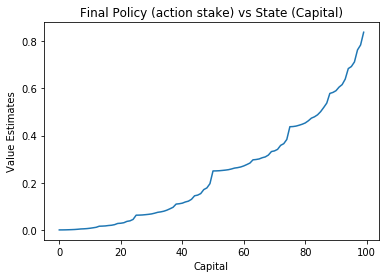

In [64]:
# Implement!
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
 
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital)')
 
# function to show the plot
plt.show()

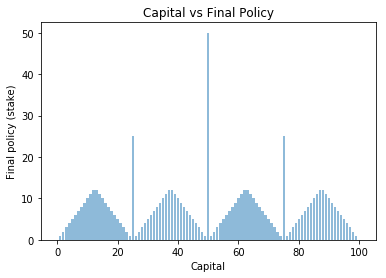

In [65]:
# Plotting Capital vs Final Policy

# Implement!
# x axis values
x = range(101)
# corresponding y axis values
y = np.argmax(policy, 1)
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()